## Plot CNN Prediction

In [1]:
# imports
import csv
import statistics
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from math import pi
import math

In [2]:
def file_exists(file):
    return os.path.isfile(file)

In [3]:
# base-path file
data_path = "csv/"

# dataset filename
resnet50_file = data_path + 'predictions_resnet50.csv'
resnet101_file = data_path + 'predictions_resnet101.csv'
vrnet_file = data_path + 'predictions_vresnet50scratch.csv'

In [4]:
def read_dataset(dataset_name):
    if dataset_name == "resnet50":
        return read_dataset_cnn(resnet50_file)
    elif dataset_name == "resnet101":
        return read_dataset_cnn(resnet101_file)
    elif dataset_name == "vrnet":
        return read_dataset_cnn(vrnet_file)
    else:
        return "dataset not found"

In [5]:
def abs(number):
    if number < 0:
        return number * -1
    else:
        return number

In [6]:
def read_dataset_cnn(dataset_file):
    dataset_data = []
    sum_distance = 0

    if file_exists(not dataset_file):
        return dataset_data

    with open(dataset_file, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            current_distance = abs(float(row['real']) - float(row['prediction']))
            
            sum_distance += current_distance
            
            dataset_data.append({
                "real": float(row['real']),
                "prediction": float(row['prediction']),
                "category": row['category'],
                "image": row['image'],
                "distance": current_distance
            })
    return dataset_data, sum_distance

In [7]:
# read data from dataset
resnet50, resnet50_distance = read_dataset("resnet50")
resnet101, resnet101_distance = read_dataset("resnet101")
vrnet, vrnet_distance = read_dataset("vrnet")

In [8]:
resnet50_distance

156.1506444040001

In [9]:
resnet101_distance

142.51001975999986

In [10]:
vrnet_distance

67.79040731600001

In [11]:
semmem_sorted = sorted(vrnet, key=lambda x: x['distance'])

In [12]:
image_shown_per_col = 5
image_shown_per_row = 5
image_shown_count = image_shown_per_col * image_shown_per_row

In [13]:
selected_image = []

In [14]:
for i in range(image_shown_count):
    selected_image.append(random.choice(vrnet))

<Figure size 432x288 with 0 Axes>

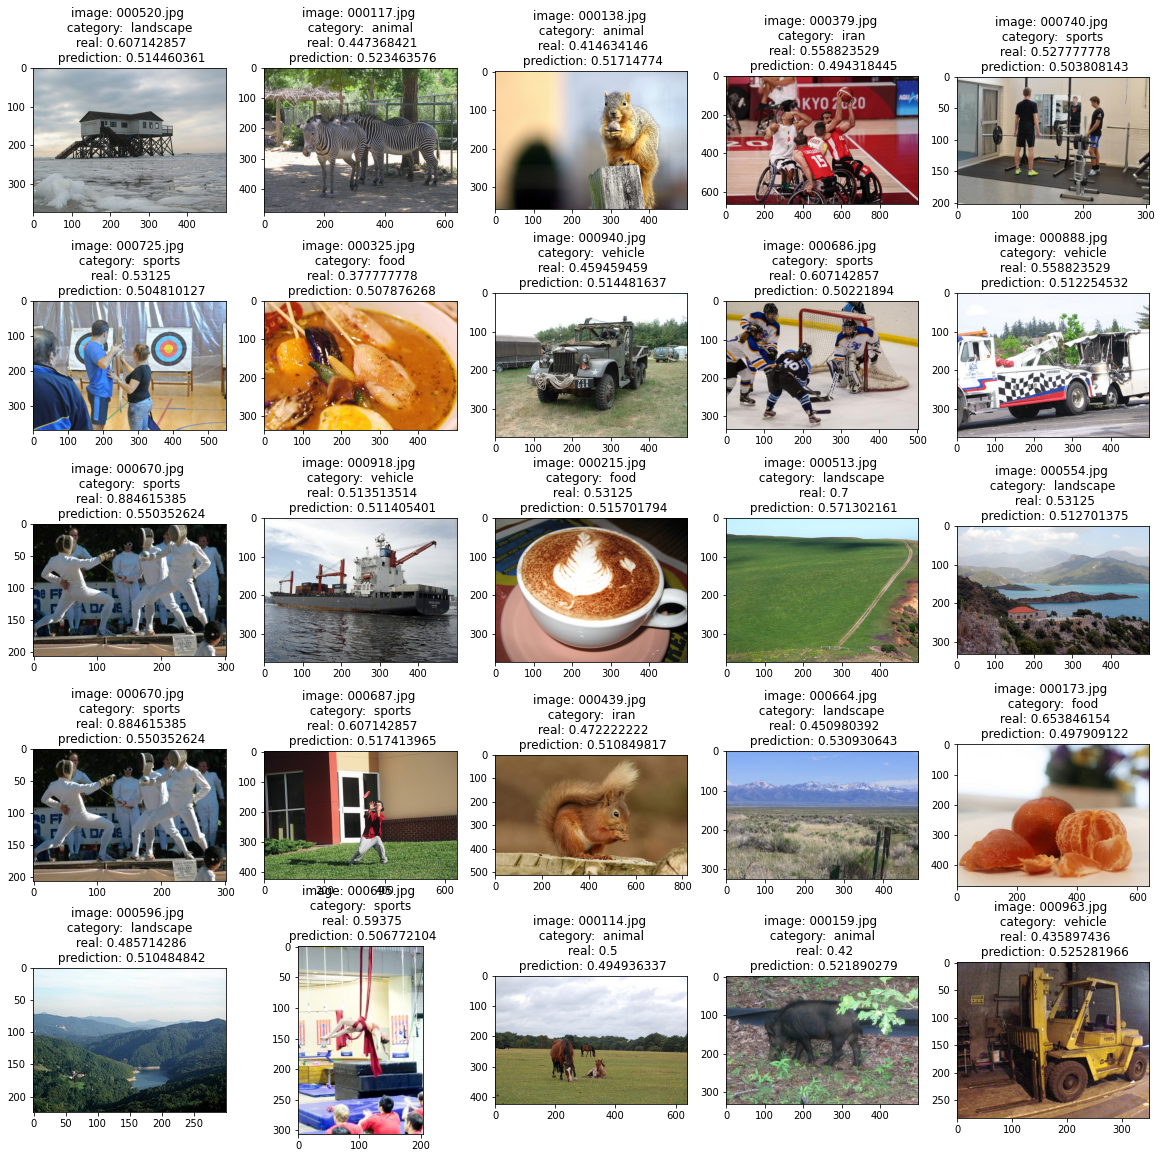

In [15]:
plt.figure()
_, fig = plt.subplots(image_shown_per_col,
                      image_shown_per_row, figsize=(20, 20))
fig = fig.flatten()
i = 0

for f in fig:
    
    new_item = selected_image[i]
    f.imshow(mpimg.imread("images/" + new_item["image"]))
    f.title.set_text("image: " + new_item["image"] + " \n category: " + new_item["category"] + " \n real: " + str(new_item["real"]) + "\n prediction: " + str(new_item["prediction"]))

    i += 1

plt.savefig("plot/random-prediction.jpg")

<Figure size 432x288 with 0 Axes>

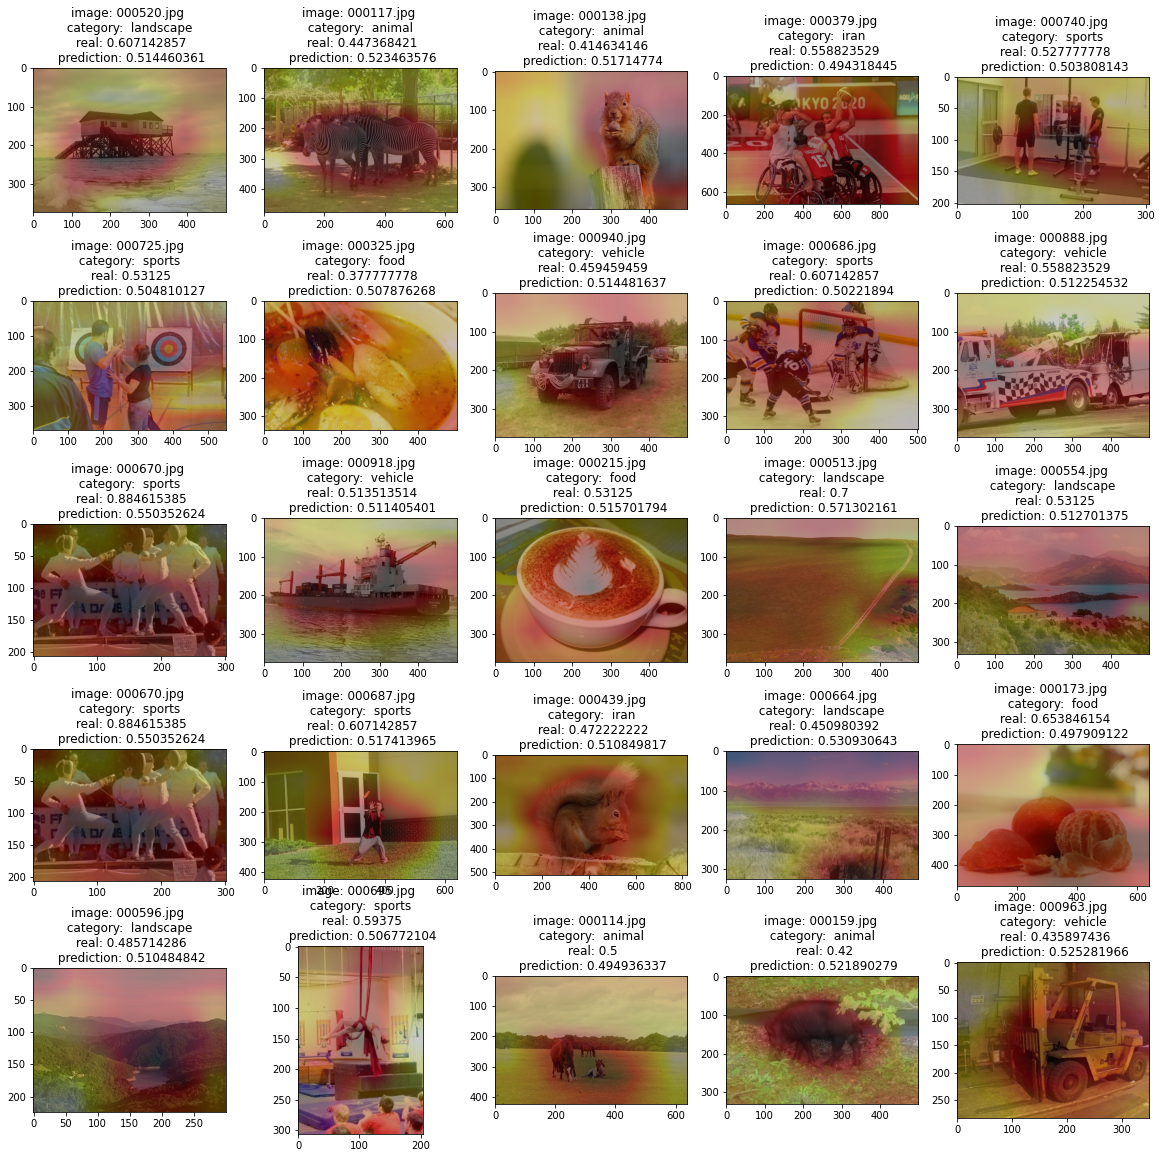

In [16]:
plt.figure()
_, fig = plt.subplots(image_shown_per_col,
                      image_shown_per_row, figsize=(20, 20))
fig = fig.flatten()
i = 0

for f in fig:
    
    new_item = selected_image[i]
    f.imshow(mpimg.imread("map/" + new_item["image"]))
    f.title.set_text("image: " + new_item["image"] + " \n category: " + new_item["category"] + " \n real: " + str(new_item["real"]) + "\n prediction: " + str(new_item["prediction"]))

    i += 1

plt.savefig("plot/random-prediction.jpg")